# Decision Trees

Using weight, age, and height to determine clothing size. 

Data Source: https://www.kaggle.com/tourist55/clothessizeprediction

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data_import = pd.read_csv("clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


## Basic EDA

In [4]:
# Explore the distribution of size data (Idea from: https://www.kaggle.com/mogrim/clothes-size-random-forest-and-decision-tree)

data_import["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

## Data Preparation

### Dealing with NA

There are over 100K records here, so we'll just drop NA values

In [5]:
data_step_one = data_import.copy()

data_step_one = data_step_one.dropna(axis=0)

dropped_rows = len(data_import) - len(data_step_one)

print("Rows Dropped: ", dropped_rows)

Rows Dropped:  581


We'll also drop the XXL records since we don't have a representative amount of this data

In [6]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


### Train Test Split

In [7]:
X = data_step_one[["weight", "age", "height"]]
y = data_step_one["size"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Modeling

### Single Run

In [23]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)
decision_tree_run(None)

0.5039442210799532

### Multiple Runs with Different Tree Depths

In [25]:
accuracy = []
tree_depth = list(range(2, 100, 3))

In [26]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.44419563336556567,
 0.5039187744923406,
 0.5143009822382818,
 0.5105348872716169,
 0.5080920148608071,
 0.5054710163367092,
 0.5041986869560792,
 0.5036897552038272,
 0.503766094966665,
 0.5038678813171154,
 0.5038424347295027,
 0.5036134154409894,
 0.5037152017914398,
 0.5038169881418901,
 0.503766094966665,
 0.503638862028602,
 0.503638862028602,
 0.5037152017914398,
 0.503766094966665,
 0.5035879688533768,
 0.5037152017914398,
 0.5039442210799532,
 0.5038678813171154,
 0.5037152017914398,
 0.5038678813171154,
 0.503638862028602,
 0.5038169881418901,
 0.503638862028602,
 0.5038424347295027,
 0.5037406483790524,
 0.503638862028602,
 0.5036134154409894,
 0.5036897552038272]

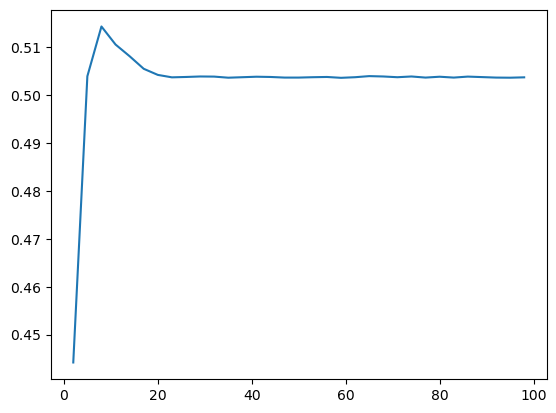

In [28]:
plt.plot(tree_depth, accuracy)

## Evaluation

### Decision Tree Graph

In [32]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = X_train.columns,
    rounded=True,
    filled=True
) 
# Run the iris_tree.dot generated in folder on graphviz website, you'll see the full decision tree

In [35]:
results = pd.DataFrame(data = {"Predictions":tree_clf.predict(X_test).tolist(), "Actuals": y_test.to_list()})
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actuals"] else "Wrong", axis=1)
results

,Predictions,Actuals,Matching
0,M,S,Wrong
1,M,M,Correct
2,XXS,S,Wrong
3,L,M,Wrong
4,L,L,Correct
...,...,...,...
39293,XXS,M,Wrong
39294,XL,XL,Correct
39295,M,M,Correct
39296,S,S,Correct


In [38]:
correct_wrong_data = results.groupby(["Actuals", "Matching"])["Predictions"].count().reset_index()
correct_wrong_data["Labels"] = correct_wrong_data["Actuals"] + " - " + correct_wrong_data["Matching"]
correct_wrong_data["Colors"] = correct_wrong_data["Matching"].map(lambda x: "b" if x == "Correct" else "r")
correct_wrong_data

,Actuals,Matching,Predictions,Labels,Colors
0,L,Correct,1292,L - Correct,b
1,L,Wrong,4531,L - Wrong,r
2,M,Correct,5947,M - Correct,b
3,M,Wrong,3658,M - Wrong,r
4,S,Correct,3209,S - Correct,b
5,S,Wrong,4111,S - Wrong,r
6,XL,Correct,2867,XL - Correct,b
7,XL,Wrong,3438,XL - Wrong,r
8,XXS,Correct,1523,XXS - Correct,b
9,XXS,Wrong,1783,XXS - Wrong,r


<BarContainer object of 12 artists>

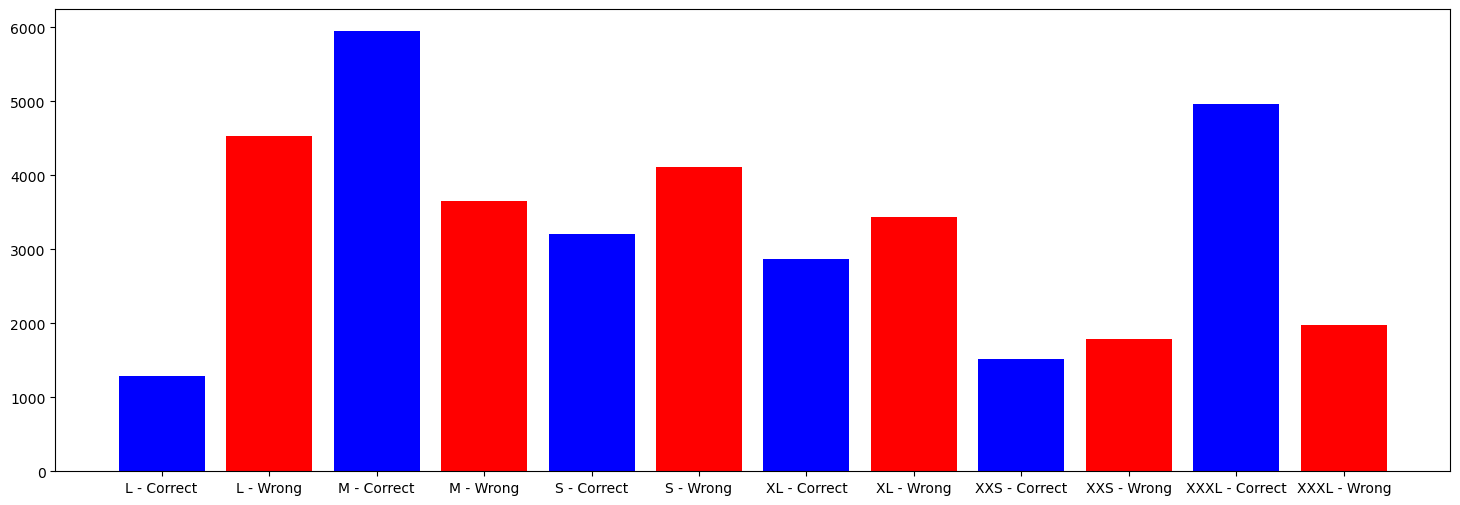

In [39]:
plt.figure(figsize=(18, 6))
fig = plt.bar(x=correct_wrong_data["Labels"], height=correct_wrong_data["Predictions"], color=correct_wrong_data["Colors"])
fig

In [41]:
confusion_matrix(y_test, tree_clf.predict(X_test).tolist())

array([[1292, 2352,  187, 1699,   15,  278],
       [1065, 5947, 1604,  689,  196,  104],
       [ 157, 2806, 3209,   64, 1064,   20],
       [1040, 1152,  101, 2867,   11, 1134],
       [   8,  329, 1436,    7, 1523,    3],
       [ 251,  168,   15, 1527,   13, 4965]], dtype=int64)

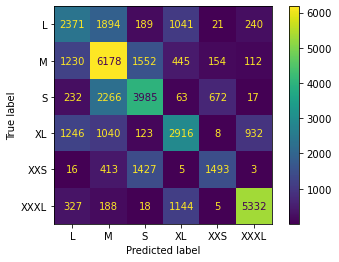

In [170]:
plot_confusion_matrix(tree_clf, X_test, y_test)